In [1]:
#### Good youtube resource for this code : https://www.youtube.com/watch?v=L7qjQu2ry2Q

import numpy as np
import os
import time
# from vgg16 import VGG16
from newvgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sagemaker import get_execution_role
import s3fs
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import pickle
from sagemaker import get_execution_role
import s3fs
import matplotlib.image as mpimg
from PIL import Image
import h5py
import boto3
import io

Using TensorFlow backend.


In [2]:
fs = s3fs.S3FileSystem()

In [3]:
train_images = [['Michelangelo_45.jpg', 'Michelangelo_44.jpg', 'Michelangelo_46.jpg', 'Michelangelo_47.jpg', 'Michelangelo_43.jpg', 'Michelangelo_42.jpg', 'Michelangelo_40.jpg', 'Michelangelo_9.jpg', 'Michelangelo_8.jpg', 'Michelangelo_41.jpg', 'Michelangelo_26.jpg', 'Michelangelo_32.jpg', 'Michelangelo_33.jpg', 'Michelangelo_27.jpg', 'Michelangelo_19.jpg', 'Michelangelo_31.jpg', 'Michelangelo_25.jpg', 'Michelangelo_24.jpg', 'Michelangelo_30.jpg', 'Michelangelo_18.jpg', 'Michelangelo_34.jpg', 'Michelangelo_20.jpg', 'Michelangelo_21.jpg', 'Michelangelo_35.jpg', 'Michelangelo_23.jpg', 'Michelangelo_37.jpg', 'Michelangelo_36.jpg', 'Michelangelo_22.jpg', 'Michelangelo_13.jpg', 'Michelangelo_12.jpg', 'Michelangelo_38.jpg', 'Michelangelo_10.jpg', 'Michelangelo_11.jpg', 'Michelangelo_39.jpg', 'Michelangelo_15.jpg', 'Michelangelo_29.jpg', 'Michelangelo_28.jpg', 'Michelangelo_14.jpg', 'Michelangelo_16.jpg'], ['Titian_232.jpg', 'Titian_226.jpg', 'Titian_144.jpg', 'Titian_91.jpg', 'Titian_85.jpg', 'Titian_150.jpg', 'Titian_178.jpg', 'Titian_187.jpg', 'Titian_52.jpg', 'Titian_46.jpg', 'Titian_193.jpg', 'Titian_47.jpg', 'Titian_192.jpg', 'Titian_186.jpg', 'Titian_53.jpg', 'Titian_179.jpg', 'Titian_84.jpg', 'Titian_151.jpg', 'Titian_145.jpg', 'Titian_90.jpg', 'Titian_227.jpg', 'Titian_233.jpg', 'Titian_225.jpg', 'Titian_231.jpg', 'Titian_219.jpg', 'Titian_153.jpg', 'Titian_86.jpg', 'Titian_92.jpg', 'Titian_147.jpg', 'Titian_190.jpg', 'Titian_45.jpg', 'Titian_51.jpg', 'Titian_184.jpg', 'Titian_79.jpg', 'Titian_78.jpg', 'Titian_50.jpg', 'Titian_185.jpg', 'Titian_191.jpg', 'Titian_44.jpg', 'Titian_93.jpg', 'Titian_146.jpg', 'Titian_152.jpg', 'Titian_87.jpg', 'Titian_218.jpg', 'Titian_230.jpg', 'Titian_224.jpg', 'Titian_208.jpg', 'Titian_220.jpg', 'Titian_234.jpg', 'Titian_83.jpg', 'Titian_156.jpg', 'Titian_142.jpg', 'Titian_97.jpg', 'Titian_68.jpg', 'Titian_40.jpg', 'Titian_195.jpg', 'Titian_181.jpg', 'Titian_54.jpg', 'Titian_180.jpg', 'Titian_55.jpg', 'Titian_41.jpg', 'Titian_194.jpg', 'Titian_69.jpg', 'Titian_143.jpg', 'Titian_96.jpg', 'Titian_82.jpg', 'Titian_157.jpg', 'Titian_235.jpg', 'Titian_221.jpg', 'Titian_209.jpg', 'Titian_237.jpg', 'Titian_223.jpg', 'Titian_169.jpg', 'Titian_94.jpg', 'Titian_141.jpg', 'Titian_155.jpg', 'Titian_80.jpg', 'Titian_57.jpg', 'Titian_182.jpg', 'Titian_196.jpg', 'Titian_43.jpg', 'Titian_197.jpg', 'Titian_42.jpg', 'Titian_56.jpg', 'Titian_183.jpg', 'Titian_154.jpg', 'Titian_81.jpg', 'Titian_95.jpg', 'Titian_140.jpg', 'Titian_168.jpg', 'Titian_222.jpg', 'Titian_236.jpg', 'Titian_251.jpg', 'Titian_245.jpg', 'Titian_127.jpg', 'Titian_133.jpg', 'Titian_31.jpg', 'Titian_25.jpg', 'Titian_19.jpg', 'Titian_18.jpg', 'Titian_24.jpg', 'Titian_30.jpg', 'Titian_132.jpg', 'Titian_126.jpg', 'Titian_244.jpg', 'Titian_250.jpg', 'Titian_246.jpg', 'Titian_252.jpg', 'Titian_130.jpg', 'Titian_124.jpg', 'Titian_118.jpg', 'Titian_26.jpg', 'Titian_32.jpg', 'Titian_8.jpg', 'Titian_9.jpg', 'Titian_33.jpg', 'Titian_27.jpg', 'Titian_119.jpg', 'Titian_125.jpg', 'Titian_131.jpg', 'Titian_253.jpg', 'Titian_247.jpg', 'Titian_243.jpg', 'Titian_109.jpg', 'Titian_135.jpg', 'Titian_121.jpg', 'Titian_23.jpg', 'Titian_37.jpg', 'Titian_36.jpg', 'Titian_22.jpg', 'Titian_120.jpg', 'Titian_134.jpg', 'Titian_108.jpg', 'Titian_242.jpg', 'Titian_254.jpg', 'Titian_240.jpg', 'Titian_122.jpg', 'Titian_136.jpg', 'Titian_34.jpg', 'Titian_20.jpg', 'Titian_21.jpg', 'Titian_35.jpg', 'Titian_137.jpg', 'Titian_123.jpg', 'Titian_241.jpg', 'Titian_255.jpg', 'Titian_106.jpg', 'Titian_112.jpg', 'Titian_10.jpg', 'Titian_38.jpg', 'Titian_2.jpg', 'Titian_3.jpg', 'Titian_39.jpg', 'Titian_11.jpg', 'Titian_113.jpg', 'Titian_107.jpg', 'Titian_111.jpg', 'Titian_105.jpg', 'Titian_139.jpg', 'Titian_13.jpg', 'Titian_1.jpg', 'Titian_12.jpg', 'Titian_138.jpg', 'Titian_104.jpg', 'Titian_110.jpg', 'Titian_128.jpg', 'Titian_114.jpg', 'Titian_100.jpg', 'Titian_16.jpg', 'Titian_4.jpg', 'Titian_5.jpg', 'Titian_17.jpg', 'Titian_101.jpg', 'Titian_115.jpg', 'Titian_129.jpg', 'Titian_249.jpg', 'Titian_103.jpg', 'Titian_117.jpg', 'Titian_29.jpg', 'Titian_15.jpg', 'Titian_7.jpg', 'Titian_6.jpg', 'Titian_14.jpg', 'Titian_28.jpg', 'Titian_116.jpg', 'Titian_102.jpg', 'Titian_248.jpg', 'Titian_213.jpg', 'Titian_207.jpg', 'Titian_165.jpg', 'Titian_171.jpg', 'Titian_159.jpg', 'Titian_98.jpg', 'Titian_73.jpg', 'Titian_67.jpg', 'Titian_66.jpg', 'Titian_72.jpg', 'Titian_99.jpg', 'Titian_158.jpg', 'Titian_170.jpg', 'Titian_164.jpg', 'Titian_206.jpg', 'Titian_212.jpg'], ['El_Greco_67.jpg', 'El_Greco_73.jpg', 'El_Greco_72.jpg', 'El_Greco_66.jpg', 'El_Greco_70.jpg', 'El_Greco_64.jpg', 'El_Greco_58.jpg', 'El_Greco_9.jpg', 'El_Greco_8.jpg', 'El_Greco_59.jpg', 'El_Greco_65.jpg', 'El_Greco_71.jpg', 'El_Greco_49.jpg', 'El_Greco_75.jpg', 'El_Greco_61.jpg', 'El_Greco_60.jpg', 'El_Greco_74.jpg', 'El_Greco_48.jpg', 'El_Greco_62.jpg', 'El_Greco_76.jpg', 'El_Greco_77.jpg', 'El_Greco_63.jpg', 'El_Greco_10.jpg', 'El_Greco_38.jpg', 'El_Greco_39.jpg', 'El_Greco_11.jpg', 'El_Greco_13.jpg', 'El_Greco_12.jpg', 'El_Greco_16.jpg', 'El_Greco_17.jpg', 'El_Greco_29.jpg', 'El_Greco_15.jpg', 'El_Greco_14.jpg', 'El_Greco_28.jpg', 'El_Greco_25.jpg', 'El_Greco_31.jpg', 'El_Greco_19.jpg', 'El_Greco_18.jpg', 'El_Greco_30.jpg', 'El_Greco_24.jpg', 'El_Greco_32.jpg', 'El_Greco_26.jpg', 'El_Greco_27.jpg', 'El_Greco_33.jpg', 'El_Greco_37.jpg', 'El_Greco_23.jpg', 'El_Greco_22.jpg', 'El_Greco_36.jpg', 'El_Greco_20.jpg', 'El_Greco_34.jpg', 'El_Greco_35.jpg', 'El_Greco_21.jpg', 'El_Greco_85.jpg', 'El_Greco_46.jpg', 'El_Greco_52.jpg', 'El_Greco_3.jpg', 'El_Greco_2.jpg', 'El_Greco_53.jpg', 'El_Greco_47.jpg', 'El_Greco_84.jpg', 'El_Greco_86.jpg', 'El_Greco_51.jpg', 'El_Greco_45.jpg', 'El_Greco_79.jpg', 'El_Greco_1.jpg', 'El_Greco_78.jpg', 'El_Greco_44.jpg', 'El_Greco_50.jpg', 'El_Greco_87.jpg'], ['Eugene_Delacroix_19.jpg', 'Eugene_Delacroix_31.jpg', 'Eugene_Delacroix_25.jpg', 'Eugene_Delacroix_24.jpg', 'Eugene_Delacroix_30.jpg', 'Eugene_Delacroix_18.jpg', 'Eugene_Delacroix_8.jpg', 'Eugene_Delacroix_26.jpg', 'Eugene_Delacroix_27.jpg', 'Eugene_Delacroix_9.jpg', 'Eugene_Delacroix_23.jpg', 'Eugene_Delacroix_22.jpg', 'Eugene_Delacroix_20.jpg', 'Eugene_Delacroix_21.jpg', 'Eugene_Delacroix_2.jpg', 'Eugene_Delacroix_10.jpg', 'Eugene_Delacroix_11.jpg', 'Eugene_Delacroix_3.jpg', 'Eugene_Delacroix_1.jpg', 'Eugene_Delacroix_13.jpg', 'Eugene_Delacroix_12.jpg', 'Eugene_Delacroix_4.jpg', 'Eugene_Delacroix_16.jpg', 'Eugene_Delacroix_17.jpg'], ['Sandro_Botticelli_127.jpg', 'Sandro_Botticelli_133.jpg', 'Sandro_Botticelli_20.jpg', 'Sandro_Botticelli_34.jpg', 'Sandro_Botticelli_35.jpg', 'Sandro_Botticelli_21.jpg', 'Sandro_Botticelli_132.jpg', 'Sandro_Botticelli_126.jpg', 'Sandro_Botticelli_130.jpg', 'Sandro_Botticelli_124.jpg', 'Sandro_Botticelli_118.jpg', 'Sandro_Botticelli_37.jpg', 'Sandro_Botticelli_23.jpg', 'Sandro_Botticelli_22.jpg', 'Sandro_Botticelli_36.jpg', 'Sandro_Botticelli_119.jpg', 'Sandro_Botticelli_125.jpg', 'Sandro_Botticelli_131.jpg', 'Sandro_Botticelli_109.jpg', 'Sandro_Botticelli_135.jpg', 'Sandro_Botticelli_121.jpg', 'Sandro_Botticelli_32.jpg', 'Sandro_Botticelli_26.jpg', 'Sandro_Botticelli_27.jpg', 'Sandro_Botticelli_33.jpg', 'Sandro_Botticelli_120.jpg', 'Sandro_Botticelli_134.jpg', 'Sandro_Botticelli_108.jpg', 'Sandro_Botticelli_122.jpg', 'Sandro_Botticelli_136.jpg', 'Sandro_Botticelli_25.jpg', 'Sandro_Botticelli_31.jpg', 'Sandro_Botticelli_19.jpg', 'Sandro_Botticelli_18.jpg', 'Sandro_Botticelli_30.jpg', 'Sandro_Botticelli_24.jpg', 'Sandro_Botticelli_137.jpg', 'Sandro_Botticelli_123.jpg', 'Sandro_Botticelli_144.jpg', 'Sandro_Botticelli_150.jpg', 'Sandro_Botticelli_43.jpg', 'Sandro_Botticelli_57.jpg', 'Sandro_Botticelli_80.jpg', 'Sandro_Botticelli_94.jpg', 'Sandro_Botticelli_95.jpg', 'Sandro_Botticelli_81.jpg', 'Sandro_Botticelli_56.jpg', 'Sandro_Botticelli_42.jpg', 'Sandro_Botticelli_151.jpg', 'Sandro_Botticelli_145.jpg', 'Sandro_Botticelli_153.jpg', 'Sandro_Botticelli_147.jpg', 'Sandro_Botticelli_68.jpg', 'Sandro_Botticelli_54.jpg', 'Sandro_Botticelli_40.jpg', 'Sandro_Botticelli_97.jpg', 'Sandro_Botticelli_83.jpg', 'Sandro_Botticelli_82.jpg', 'Sandro_Botticelli_96.jpg', 'Sandro_Botticelli_41.jpg', 'Sandro_Botticelli_55.jpg', 'Sandro_Botticelli_69.jpg', 'Sandro_Botticelli_146.jpg', 'Sandro_Botticelli_152.jpg', 'Sandro_Botticelli_156.jpg', 'Sandro_Botticelli_142.jpg', 'Sandro_Botticelli_51.jpg', 'Sandro_Botticelli_45.jpg', 'Sandro_Botticelli_79.jpg', 'Sandro_Botticelli_92.jpg', 'Sandro_Botticelli_86.jpg', 'Sandro_Botticelli_87.jpg', 'Sandro_Botticelli_93.jpg', 'Sandro_Botticelli_78.jpg', 'Sandro_Botticelli_44.jpg', 'Sandro_Botticelli_50.jpg', 'Sandro_Botticelli_143.jpg', 'Sandro_Botticelli_157.jpg', 'Sandro_Botticelli_141.jpg', 'Sandro_Botticelli_155.jpg', 'Sandro_Botticelli_46.jpg', 'Sandro_Botticelli_52.jpg', 'Sandro_Botticelli_85.jpg', 'Sandro_Botticelli_91.jpg', 'Sandro_Botticelli_9.jpg', 'Sandro_Botticelli_8.jpg', 'Sandro_Botticelli_90.jpg', 'Sandro_Botticelli_84.jpg', 'Sandro_Botticelli_53.jpg', 'Sandro_Botticelli_47.jpg', 'Sandro_Botticelli_154.jpg', 'Sandro_Botticelli_140.jpg', 'Sandro_Botticelli_159.jpg', 'Sandro_Botticelli_62.jpg', 'Sandro_Botticelli_76.jpg', 'Sandro_Botticelli_89.jpg', 'Sandro_Botticelli_5.jpg', 'Sandro_Botticelli_4.jpg', 'Sandro_Botticelli_88.jpg', 'Sandro_Botticelli_77.jpg', 'Sandro_Botticelli_63.jpg', 'Sandro_Botticelli_158.jpg', 'Sandro_Botticelli_164.jpg', 'Sandro_Botticelli_49.jpg', 'Sandro_Botticelli_75.jpg', 'Sandro_Botticelli_61.jpg', 'Sandro_Botticelli_6.jpg', 'Sandro_Botticelli_7.jpg', 'Sandro_Botticelli_60.jpg', 'Sandro_Botticelli_74.jpg', 'Sandro_Botticelli_48.jpg', 'Sandro_Botticelli_163.jpg', 'Sandro_Botticelli_70.jpg', 'Sandro_Botticelli_64.jpg', 'Sandro_Botticelli_58.jpg', 'Sandro_Botticelli_3.jpg', 'Sandro_Botticelli_2.jpg', 'Sandro_Botticelli_59.jpg', 'Sandro_Botticelli_65.jpg', 'Sandro_Botticelli_71.jpg', 'Sandro_Botticelli_162.jpg', 'Sandro_Botticelli_148.jpg', 'Sandro_Botticelli_160.jpg', 'Sandro_Botticelli_67.jpg', 'Sandro_Botticelli_73.jpg', 'Sandro_Botticelli_98.jpg', 'Sandro_Botticelli_1.jpg', 'Sandro_Botticelli_99.jpg', 'Sandro_Botticelli_72.jpg', 'Sandro_Botticelli_66.jpg', 'Sandro_Botticelli_161.jpg'], ['Gustave_Courbet_3.jpg', 'Gustave_Courbet_43.jpg', 'Gustave_Courbet_57.jpg', 'Gustave_Courbet_56.jpg', 'Gustave_Courbet_42.jpg', 'Gustave_Courbet_2.jpg', 'Gustave_Courbet_54.jpg', 'Gustave_Courbet_40.jpg', 'Gustave_Courbet_41.jpg', 'Gustave_Courbet_55.jpg', 'Gustave_Courbet_1.jpg', 'Gustave_Courbet_5.jpg', 'Gustave_Courbet_51.jpg', 'Gustave_Courbet_45.jpg', 'Gustave_Courbet_44.jpg', 'Gustave_Courbet_50.jpg', 'Gustave_Courbet_4.jpg', 'Gustave_Courbet_6.jpg', 'Gustave_Courbet_46.jpg', 'Gustave_Courbet_52.jpg', 'Gustave_Courbet_53.jpg', 'Gustave_Courbet_47.jpg', 'Gustave_Courbet_7.jpg', 'Gustave_Courbet_20.jpg', 'Gustave_Courbet_34.jpg', 'Gustave_Courbet_35.jpg', 'Gustave_Courbet_21.jpg', 'Gustave_Courbet_37.jpg', 'Gustave_Courbet_23.jpg', 'Gustave_Courbet_22.jpg', 'Gustave_Courbet_36.jpg', 'Gustave_Courbet_32.jpg', 'Gustave_Courbet_26.jpg', 'Gustave_Courbet_27.jpg', 'Gustave_Courbet_33.jpg', 'Gustave_Courbet_25.jpg', 'Gustave_Courbet_31.jpg', 'Gustave_Courbet_19.jpg', 'Gustave_Courbet_18.jpg', 'Gustave_Courbet_30.jpg', 'Gustave_Courbet_24.jpg', 'Gustave_Courbet_29.jpg', 'Gustave_Courbet_15.jpg', 'Gustave_Courbet_14.jpg', 'Gustave_Courbet_28.jpg', 'Gustave_Courbet_16.jpg', 'Gustave_Courbet_17.jpg'], ['Peter_Paul_Rubens_2.jpg', 'Peter_Paul_Rubens_42.jpg', 'Peter_Paul_Rubens_56.jpg', 'Peter_Paul_Rubens_81.jpg', 'Peter_Paul_Rubens_95.jpg', 'Peter_Paul_Rubens_111.jpg', 'Peter_Paul_Rubens_105.jpg', 'Peter_Paul_Rubens_139.jpg', 'Peter_Paul_Rubens_138.jpg', 'Peter_Paul_Rubens_104.jpg', 'Peter_Paul_Rubens_110.jpg', 'Peter_Paul_Rubens_94.jpg', 'Peter_Paul_Rubens_80.jpg', 'Peter_Paul_Rubens_57.jpg', 'Peter_Paul_Rubens_43.jpg', 'Peter_Paul_Rubens_3.jpg', 'Peter_Paul_Rubens_1.jpg', 'Peter_Paul_Rubens_55.jpg', 'Peter_Paul_Rubens_41.jpg', 'Peter_Paul_Rubens_69.jpg', 'Peter_Paul_Rubens_96.jpg', 'Peter_Paul_Rubens_82.jpg', 'Peter_Paul_Rubens_106.jpg', 'Peter_Paul_Rubens_112.jpg', 'Peter_Paul_Rubens_113.jpg', 'Peter_Paul_Rubens_107.jpg', 'Peter_Paul_Rubens_83.jpg', 'Peter_Paul_Rubens_97.jpg', 'Peter_Paul_Rubens_68.jpg', 'Peter_Paul_Rubens_40.jpg', 'Peter_Paul_Rubens_54.jpg', 'Peter_Paul_Rubens_4.jpg', 'Peter_Paul_Rubens_78.jpg', 'Peter_Paul_Rubens_50.jpg', 'Peter_Paul_Rubens_44.jpg', 'Peter_Paul_Rubens_93.jpg', 'Peter_Paul_Rubens_87.jpg', 'Peter_Paul_Rubens_103.jpg', 'Peter_Paul_Rubens_117.jpg', 'Peter_Paul_Rubens_116.jpg', 'Peter_Paul_Rubens_102.jpg', 'Peter_Paul_Rubens_86.jpg', 'Peter_Paul_Rubens_92.jpg', 'Peter_Paul_Rubens_45.jpg', 'Peter_Paul_Rubens_51.jpg', 'Peter_Paul_Rubens_79.jpg', 'Peter_Paul_Rubens_5.jpg', 'Peter_Paul_Rubens_7.jpg', 'Peter_Paul_Rubens_47.jpg', 'Peter_Paul_Rubens_53.jpg', 'Peter_Paul_Rubens_84.jpg', 'Peter_Paul_Rubens_90.jpg', 'Peter_Paul_Rubens_128.jpg', 'Peter_Paul_Rubens_114.jpg', 'Peter_Paul_Rubens_100.jpg', 'Peter_Paul_Rubens_101.jpg', 'Peter_Paul_Rubens_115.jpg', 'Peter_Paul_Rubens_129.jpg', 'Peter_Paul_Rubens_91.jpg', 'Peter_Paul_Rubens_85.jpg', 'Peter_Paul_Rubens_52.jpg', 'Peter_Paul_Rubens_46.jpg', 'Peter_Paul_Rubens_6.jpg', 'Peter_Paul_Rubens_21.jpg', 'Peter_Paul_Rubens_35.jpg', 'Peter_Paul_Rubens_34.jpg', 'Peter_Paul_Rubens_20.jpg', 'Peter_Paul_Rubens_36.jpg', 'Peter_Paul_Rubens_22.jpg', 'Peter_Paul_Rubens_23.jpg', 'Peter_Paul_Rubens_37.jpg', 'Peter_Paul_Rubens_33.jpg', 'Peter_Paul_Rubens_27.jpg', 'Peter_Paul_Rubens_26.jpg', 'Peter_Paul_Rubens_32.jpg', 'Peter_Paul_Rubens_18.jpg', 'Peter_Paul_Rubens_24.jpg', 'Peter_Paul_Rubens_30.jpg', 'Peter_Paul_Rubens_31.jpg', 'Peter_Paul_Rubens_25.jpg', 'Peter_Paul_Rubens_19.jpg', 'Peter_Paul_Rubens_14.jpg', 'Peter_Paul_Rubens_28.jpg', 'Peter_Paul_Rubens_29.jpg', 'Peter_Paul_Rubens_15.jpg', 'Peter_Paul_Rubens_17.jpg', 'Peter_Paul_Rubens_16.jpg', 'Peter_Paul_Rubens_12.jpg', 'Peter_Paul_Rubens_141.jpg', 'Peter_Paul_Rubens_140.jpg', 'Peter_Paul_Rubens_13.jpg', 'Peter_Paul_Rubens_39.jpg', 'Peter_Paul_Rubens_11.jpg', 'Peter_Paul_Rubens_10.jpg', 'Peter_Paul_Rubens_38.jpg', 'Peter_Paul_Rubens_63.jpg', 'Peter_Paul_Rubens_77.jpg', 'Peter_Paul_Rubens_88.jpg', 'Peter_Paul_Rubens_130.jpg', 'Peter_Paul_Rubens_124.jpg', 'Peter_Paul_Rubens_118.jpg', 'Peter_Paul_Rubens_119.jpg', 'Peter_Paul_Rubens_125.jpg', 'Peter_Paul_Rubens_131.jpg', 'Peter_Paul_Rubens_89.jpg', 'Peter_Paul_Rubens_76.jpg', 'Peter_Paul_Rubens_62.jpg', 'Peter_Paul_Rubens_8.jpg', 'Peter_Paul_Rubens_74.jpg', 'Peter_Paul_Rubens_60.jpg', 'Peter_Paul_Rubens_48.jpg', 'Peter_Paul_Rubens_127.jpg'], ['Caravaggio_31.jpg', 'Caravaggio_25.jpg', 'Caravaggio_19.jpg', 'Caravaggio_18.jpg', 'Caravaggio_24.jpg', 'Caravaggio_30.jpg', 'Caravaggio_26.jpg', 'Caravaggio_32.jpg', 'Caravaggio_33.jpg', 'Caravaggio_27.jpg', 'Caravaggio_23.jpg', 'Caravaggio_37.jpg', 'Caravaggio_36.jpg', 'Caravaggio_22.jpg', 'Caravaggio_34.jpg', 'Caravaggio_20.jpg', 'Caravaggio_21.jpg', 'Caravaggio_35.jpg', 'Caravaggio_3.jpg', 'Caravaggio_52.jpg', 'Caravaggio_46.jpg', 'Caravaggio_47.jpg', 'Caravaggio_53.jpg', 'Caravaggio_2.jpg', 'Caravaggio_45.jpg', 'Caravaggio_51.jpg', 'Caravaggio_50.jpg', 'Caravaggio_44.jpg', 'Caravaggio_1.jpg', 'Caravaggio_5.jpg', 'Caravaggio_40.jpg', 'Caravaggio_54.jpg', 'Caravaggio_55.jpg', 'Caravaggio_41.jpg', 'Caravaggio_4.jpg', 'Caravaggio_6.jpg', 'Caravaggio_43.jpg', 'Caravaggio_42.jpg', 'Caravaggio_7.jpg', 'Caravaggio_9.jpg', 'Caravaggio_8.jpg', 'Caravaggio_49.jpg', 'Caravaggio_48.jpg'], ['Raphael_106.jpg', 'Raphael_18.jpg', 'Raphael_24.jpg', 'Raphael_30.jpg', 'Raphael_31.jpg', 'Raphael_25.jpg', 'Raphael_19.jpg', 'Raphael_107.jpg', 'Raphael_105.jpg', 'Raphael_33.jpg', 'Raphael_27.jpg', 'Raphael_26.jpg', 'Raphael_32.jpg', 'Raphael_104.jpg', 'Raphael_100.jpg', 'Raphael_36.jpg', 'Raphael_22.jpg', 'Raphael_23.jpg', 'Raphael_37.jpg', 'Raphael_101.jpg', 'Raphael_103.jpg', 'Raphael_21.jpg', 'Raphael_35.jpg', 'Raphael_34.jpg', 'Raphael_20.jpg', 'Raphael_102.jpg', 'Raphael_84.jpg', 'Raphael_90.jpg', 'Raphael_47.jpg', 'Raphael_53.jpg', 'Raphael_52.jpg', 'Raphael_46.jpg', 'Raphael_91.jpg', 'Raphael_85.jpg', 'Raphael_93.jpg', 'Raphael_87.jpg', 'Raphael_78.jpg', 'Raphael_50.jpg', 'Raphael_44.jpg', 'Raphael_45.jpg', 'Raphael_51.jpg', 'Raphael_79.jpg', 'Raphael_86.jpg', 'Raphael_92.jpg', 'Raphael_96.jpg', 'Raphael_82.jpg', 'Raphael_55.jpg', 'Raphael_41.jpg', 'Raphael_69.jpg', 'Raphael_68.jpg', 'Raphael_40.jpg', 'Raphael_54.jpg', 'Raphael_83.jpg', 'Raphael_97.jpg', 'Raphael_81.jpg', 'Raphael_95.jpg', 'Raphael_9.jpg', 'Raphael_42.jpg', 'Raphael_56.jpg', 'Raphael_57.jpg', 'Raphael_43.jpg', 'Raphael_8.jpg', 'Raphael_94.jpg', 'Raphael_80.jpg', 'Raphael_99.jpg', 'Raphael_5.jpg', 'Raphael_66.jpg', 'Raphael_72.jpg', 'Raphael_73.jpg', 'Raphael_67.jpg', 'Raphael_4.jpg', 'Raphael_98.jpg', 'Raphael_6.jpg', 'Raphael_59.jpg', 'Raphael_71.jpg', 'Raphael_65.jpg', 'Raphael_64.jpg', 'Raphael_70.jpg', 'Raphael_58.jpg', 'Raphael_7.jpg', 'Raphael_3.jpg', 'Raphael_74.jpg', 'Raphael_60.jpg', 'Raphael_48.jpg', 'Raphael_49.jpg', 'Raphael_61.jpg', 'Raphael_75.jpg'], ['Rembrandt_133.jpg', 'Rembrandt_127.jpg', 'Rembrandt_99.jpg', 'Rembrandt_72.jpg', 'Rembrandt_66.jpg', 'Rembrandt_245.jpg', 'Rembrandt_251.jpg', 'Rembrandt_250.jpg', 'Rembrandt_244.jpg', 'Rembrandt_67.jpg', 'Rembrandt_73.jpg', 'Rembrandt_98.jpg', 'Rembrandt_126.jpg', 'Rembrandt_132.jpg', 'Rembrandt_124.jpg', 'Rembrandt_130.jpg', 'Rembrandt_118.jpg', 'Rembrandt_59.jpg', 'Rembrandt_65.jpg', 'Rembrandt_71.jpg', 'Rembrandt_252.jpg', 'Rembrandt_246.jpg', 'Rembrandt_247.jpg', 'Rembrandt_253.jpg', 'Rembrandt_70.jpg', 'Rembrandt_64.jpg', 'Rembrandt_58.jpg', 'Rembrandt_119.jpg', 'Rembrandt_131.jpg', 'Rembrandt_125.jpg', 'Rembrandt_109.jpg', 'Rembrandt_121.jpg', 'Rembrandt_135.jpg', 'Rembrandt_60.jpg', 'Rembrandt_74.jpg', 'Rembrandt_48.jpg', 'Rembrandt_257.jpg', 'Rembrandt_243.jpg', 'Rembrandt_242.jpg', 'Rembrandt_256.jpg', 'Rembrandt_49.jpg', 'Rembrandt_75.jpg', 'Rembrandt_61.jpg', 'Rembrandt_134.jpg', 'Rembrandt_120.jpg', 'Rembrandt_108.jpg', 'Rembrandt_88.jpg', 'Rembrandt_136.jpg', 'Rembrandt_122.jpg', 'Rembrandt_77.jpg', 'Rembrandt_63.jpg', 'Rembrandt_240.jpg', 'Rembrandt_254.jpg', 'Rembrandt_255.jpg', 'Rembrandt_241.jpg', 'Rembrandt_62.jpg', 'Rembrandt_76.jpg', 'Rembrandt_123.jpg', 'Rembrandt_137.jpg', 'Rembrandt_89.jpg', 'Rembrandt_150.jpg', 'Rembrandt_144.jpg', 'Rembrandt_178.jpg', 'Rembrandt_193.jpg', 'Rembrandt_187.jpg', 'Rembrandt_39.jpg', 'Rembrandt_8.jpg', 'Rembrandt_11.jpg', 'Rembrandt_226.jpg', 'Rembrandt_232.jpg', 'Rembrandt_233.jpg', 'Rembrandt_227.jpg', 'Rembrandt_10.jpg', 'Rembrandt_9.jpg', 'Rembrandt_38.jpg', 'Rembrandt_186.jpg', 'Rembrandt_192.jpg', 'Rembrandt_179.jpg', 'Rembrandt_145.jpg', 'Rembrandt_151.jpg', 'Rembrandt_147.jpg', 'Rembrandt_153.jpg', 'Rembrandt_184.jpg', 'Rembrandt_190.jpg', 'Rembrandt_12.jpg', 'Rembrandt_231.jpg', 'Rembrandt_225.jpg', 'Rembrandt_219.jpg', 'Rembrandt_218.jpg', 'Rembrandt_224.jpg', 'Rembrandt_230.jpg', 'Rembrandt_13.jpg', 'Rembrandt_191.jpg', 'Rembrandt_185.jpg', 'Rembrandt_152.jpg', 'Rembrandt_146.jpg', 'Rembrandt_142.jpg', 'Rembrandt_156.jpg', 'Rembrandt_17.jpg', 'Rembrandt_181.jpg', 'Rembrandt_195.jpg', 'Rembrandt_208.jpg', 'Rembrandt_234.jpg', 'Rembrandt_220.jpg', 'Rembrandt_221.jpg', 'Rembrandt_235.jpg', 'Rembrandt_209.jpg', 'Rembrandt_194.jpg', 'Rembrandt_180.jpg', 'Rembrandt_16.jpg', 'Rembrandt_157.jpg', 'Rembrandt_143.jpg', 'Rembrandt_169.jpg', 'Rembrandt_155.jpg', 'Rembrandt_141.jpg', 'Rembrandt_14.jpg', 'Rembrandt_28.jpg', 'Rembrandt_196.jpg', 'Rembrandt_182.jpg', 'Rembrandt_223.jpg', 'Rembrandt_237.jpg', 'Rembrandt_236.jpg', 'Rembrandt_222.jpg', 'Rembrandt_183.jpg', 'Rembrandt_197.jpg', 'Rembrandt_29.jpg', 'Rembrandt_15.jpg', 'Rembrandt_140.jpg', 'Rembrandt_154.jpg', 'Rembrandt_168.jpg', 'Rembrandt_171.jpg', 'Rembrandt_165.jpg', 'Rembrandt_159.jpg', 'Rembrandt_1.jpg', 'Rembrandt_18.jpg', 'Rembrandt_30.jpg', 'Rembrandt_24.jpg', 'Rembrandt_207.jpg', 'Rembrandt_213.jpg', 'Rembrandt_212.jpg', 'Rembrandt_206.jpg', 'Rembrandt_25.jpg', 'Rembrandt_31.jpg', 'Rembrandt_19.jpg', 'Rembrandt_158.jpg', 'Rembrandt_164.jpg', 'Rembrandt_170.jpg', 'Rembrandt_166.jpg', 'Rembrandt_172.jpg', 'Rembrandt_2.jpg', 'Rembrandt_199.jpg', 'Rembrandt_27.jpg', 'Rembrandt_33.jpg', 'Rembrandt_210.jpg', 'Rembrandt_204.jpg', 'Rembrandt_238.jpg', 'Rembrandt_239.jpg', 'Rembrandt_205.jpg', 'Rembrandt_211.jpg', 'Rembrandt_32.jpg', 'Rembrandt_26.jpg', 'Rembrandt_198.jpg', 'Rembrandt_3.jpg', 'Rembrandt_173.jpg', 'Rembrandt_167.jpg', 'Rembrandt_163.jpg', 'Rembrandt_177.jpg', 'Rembrandt_22.jpg', 'Rembrandt_36.jpg', 'Rembrandt_188.jpg', 'Rembrandt_7.jpg', 'Rembrandt_229.jpg', 'Rembrandt_215.jpg', 'Rembrandt_201.jpg', 'Rembrandt_200.jpg', 'Rembrandt_214.jpg', 'Rembrandt_228.jpg', 'Rembrandt_6.jpg', 'Rembrandt_189.jpg', 'Rembrandt_37.jpg', 'Rembrandt_23.jpg', 'Rembrandt_176.jpg', 'Rembrandt_162.jpg', 'Rembrandt_148.jpg', 'Rembrandt_174.jpg', 'Rembrandt_160.jpg', 'Rembrandt_35.jpg', 'Rembrandt_21.jpg', 'Rembrandt_4.jpg', 'Rembrandt_202.jpg', 'Rembrandt_216.jpg', 'Rembrandt_217.jpg', 'Rembrandt_203.jpg', 'Rembrandt_5.jpg', 'Rembrandt_20.jpg', 'Rembrandt_34.jpg', 'Rembrandt_161.jpg', 'Rembrandt_175.jpg', 'Rembrandt_149.jpg', 'Rembrandt_112.jpg', 'Rembrandt_106.jpg', 'Rembrandt_90.jpg', 'Rembrandt_84.jpg', 'Rembrandt_53.jpg', 'Rembrandt_47.jpg', 'Rembrandt_258.jpg', 'Rembrandt_259.jpg', 'Rembrandt_46.jpg', 'Rembrandt_52.jpg']]
merged_train_images = [inner for outer in train_images for inner in outer]
print(merged_train_images[0])
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket('sagemaker-studio-sqsv4ommlw8')

Michelangelo_45.jpg


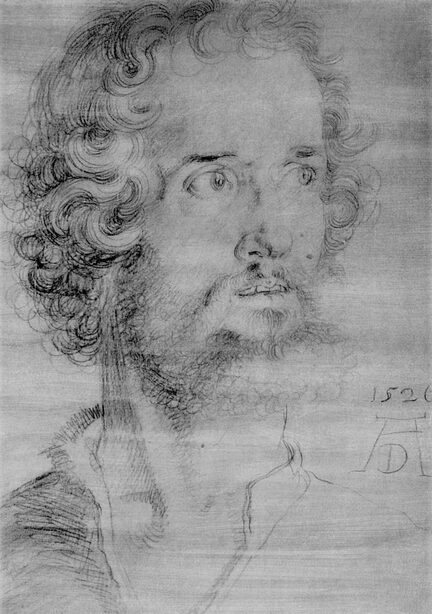

s3://sagemaker-studio-sqsv4ommlw8/resized/Albrecht_Dürer_1.jpg


In [4]:
ctr = 0
for x in bucket.objects.all():
    if ctr > 0:
        break
    with fs.open('s3://' + x.bucket_name + '/' + x.key) as f:
        img = Image.open(f)
        display(img)
#         display(Image.open(f))
#         img = image.load_img(f, target_size=(224, 224))
    print('s3://' + x.bucket_name + '/' + x.key)
#     print(x)
#     print(x.bucket_name)
#     object = bucket.Object('resized/Caravaggio_1.jpg')
    ctr += 1
    
# with fs.open('s3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_23.jpg') as f:
#     display(Image.open(f))

# file_stream = io.BytesIO()

s3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_1.jpg


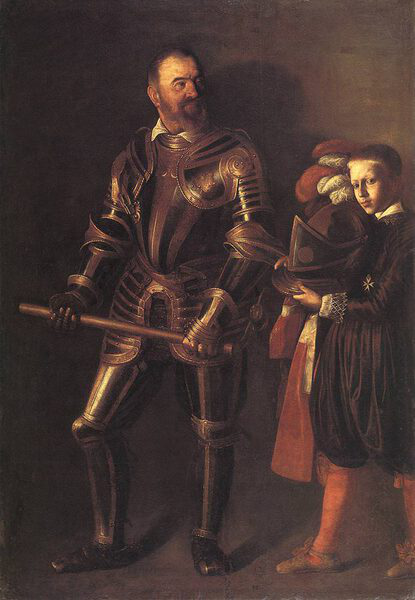

In [5]:
fs = s3fs.S3FileSystem()

directory = 's3://sagemaker-studio-sqsv4ommlw8/resized'
filenames = fs.ls(directory)
# print(filenames[0])

validArtists = ['Caravaggio', 'El_Greco', 'Eugene_Delacroix', 'Gustave_Courbet', 'Michelangelo', 'Peter_Paul_Rubens', 'Raphael', 'Rembrandt', 'Sandro_Botticelli', 'Titian']

newdir = []
for filename in filenames:
    if any(artist in filename for artist in validArtists) and 'Titian_233' not in filename:
        newdir.append('s3://' + filename)

print(newdir[0])

with fs.open(newdir[0]) as f:
    display(Image.open(f))

# pd.read_csv(data_location)

In [6]:
print(newdir)

['s3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_1.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_10.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_11.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_12.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_13.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_14.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_15.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_16.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_17.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_18.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_19.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_2.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_20.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_21.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_22.jpg', 's3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_23

In [7]:
# # with fs.open('s3://sagemaker-studio-sqsv4ommlw8/resized/Caravaggio_1.jpg', 'rb') as f:
# #     openimg = Image.open(f)
# #     img = openimg.resize((224, 224))
# #     display(img)
# #     x = image.img_to_array(img)
# #     print(x.shape)

# # os.listdir('outputs')
# with open('outputs/colorization_1615691977.8080215.png', 'rb') as f:
    
#     openimg = Image.open(f)
#     openimg = openimg.resize((224, 224))
# #     display(openimg)
# #     newimg = openimg.resize((256, 256))
# # #     display(newimg)
# #     newestimg = newimg.resize((224, 224))
# #     display(newestimg)

#     openimg.load() # required for png.split()

#     background = Image.new("RGB", openimg.size, (255, 255, 255))
#     background.paste(openimg, mask=openimg.split()[3])
    
# #     img = openimg.resize((224, 224))
# #     display(img)
    
# #     newimg = Image.new('RGB', (224, 224), (255, 255, 255))
# #     newimg.paste(img, None)
# #     newimg = newimg.crop((30, 26, 224-30, 224-26))
    
#     display(background)
# # #     mynewimgdata = img.getdata()
# # #     print(len(newimg))
#     x = image.img_to_array(background)
#     print(x.shape)
# #     print(x[22])
# #     print(x[23])
# #     print(x[24])
    
# #     print(x[25])
# #     print("BREAK\n\n\n")
# #     print(x[26])
    


In [8]:
################################################################## Ignore this part - for illustration only
#img_path = 'elephant.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#print (x.shape)
#x = np.expand_dims(x, axis=0)
#print (x.shape)
#x = preprocess_input(x)
#print('Input image shape:', x.shape)
#################################################################### continue


# Loading the training data
# PATH = os.getcwd()
# Define data path
# data_path = PATH + '/data'                                   ###### Add path 
# data_dir_list = os.listdir(data_path)

# data_dir_list = newdir

# img_data_list=[]

# for dataset in data_dir_list:
#     img_list=os.listdir(data_path+'/'+ dataset)
#     print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
#     for img in newdir:
#         img_path = data_path + '/'+ dataset + '/'+ img
#         img = image.load_img(img_path, target_size=(224, 224))
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
#         #		x = x/255
#         print('Input image shape:', x.shape)
#         img_data_list.append(x)

img_data_list=[]
for newimg in tqdm(newdir):
#     print(newimg)
#     f = fs.open(newimg, "rb")
    with fs.open(newimg) as f:
#         print('printing', newimg, type(file))
        openimg = Image.open(f)
        img = openimg.resize((224, 224))
#         img = image.load_img(openimg, target_size=(224, 224))
        
        x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    try:
        x = preprocess_input(x)
    except:
        print("EXCEPTION: ", newimg)
    #		x = x/255
#     print('Input image shape:', x.shape)
    img_data_list.append(x)
    
print("Finished iterating!")
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Finished iterating!
(1211, 1, 224, 224, 3)
(1, 1211, 224, 224, 3)
(1211, 224, 224, 3)


In [9]:
# with open('training_img_data.pickle', 'wb') as f:
#     pickle.dump(img_data, f)

In [10]:
# Define the number of classes - 10 artists in realistic dataset so 10 classes
num_classes = 10                                          ############### 10 classes - also labelled below
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

## Code snipped below generates indices for our labels
# cumsum = 0
# for i in range(10):
#     cumsum += len(train_images[i])
#     print(cumsum)

#Classifier Training Dataset containing 80% of the paintings of all realistic artists - lables added below
# labels[0:39]=0
# labels[39:242]=1
# labels[242:311]=2
# labels[311:335]=3
# labels[335:466]=4
# labels[466:513]=5
# labels[513:625]=6
# labels[625:668]=7
# labels[668:755]=8
# labels[755:964]=9

labels[0:55]=0
labels[55:142]=1
labels[142:173]=2
labels[173:232]=3
labels[232:281]=4
labels[281:422]=5
labels[422:531]=6
labels[531:793]=7
labels[793:957]=8
labels[957:1211]=9

# names = ['Michelangelo', 'Titian', 'El Greco','Eugene Delacroix', 'Sandro Botticelli', 'Gustave Courbet',
#          'Peter Paul Rubens', 'Caravaggio', 'Raphael', 'Rembrandt', 'Peter Paul Rubens']

# Caravaggio 0 55
# El_Greco 55 142
# Eugene_Delacroix 142 173
# Gustave_Courbet 173 232
# Michelangelo 232 281
# Peter_Paul_Rubens 281 422
# Raphael 422 531
# Rembrandt 531 793
# Sandro_Botticelli 793 957
# Titian 957 1211

In [94]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
# x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [95]:
#########################################################################################
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
# model = VGG16()
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


####################################################################################################################

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112

In [104]:
#Training the feature extraction also

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

# # freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

# freeze all the layers except the last pooling sequence, and the dense layers
# for layer in custom_vgg_model2.layers[:-8]:
#     layer.trainable = False

custom_vgg_model2.summary()

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [105]:
t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 968 samples, validate on 243 samples
Epoch 1/12
968/968 [==============================] - 16s 17ms/step - loss: 12.3737 - accuracy: 0.2779 - val_loss: 3.3591 - val_accuracy: 0.3374
Epoch 2/12
968/968 [==============================] - 16s 16ms/step - loss: 1.5946 - accuracy: 0.6178 - val_loss: 1.8150 - val_accuracy: 0.5350
Epoch 3/12
968/968 [==============================] - 16s 17ms/step - loss: 0.5266 - accuracy: 0.8523 - val_loss: 2.6774 - val_accuracy: 0.5309
Epoch 4/12
968/968 [==============================] - 16s 16ms/step - loss: 0.2292 - accuracy: 0.9308 - val_loss: 1.8920 - val_accuracy: 0.5556
Epoch 5/12
968/968 [==============================] - 16s 16ms/step - loss: 0.1046 - accuracy: 0.9680 - val_loss: 2.5638 - val_accuracy: 0.5144
Epoch 6/12
968/968 [==============================] - 16s 16ms/step - loss: 0.0583 - accuracy: 0.9845 - val_loss: 2.1957 - val_accuracy: 0.5597
Epoch 7/12
968/968 [==============================] - 16s 16ms/step - loss: 0.0367 - accu

In [106]:
#%%
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(12)

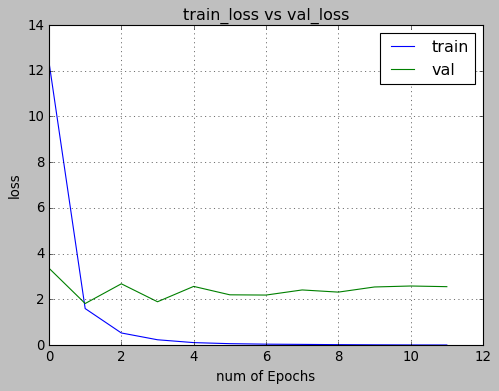

In [107]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

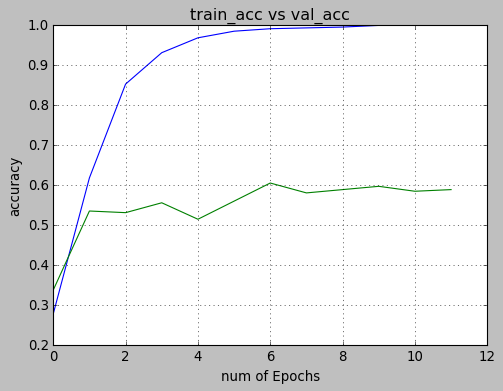

In [108]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.style.use(['classic'])

In [109]:
# with open('3rdClassifierModel_3Frozen.pickle', 'wb') as f:
#     pickle.dump(custom_vgg_model2, f)
    
# with open('3rdClassifier_X_train.pickle', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('3rdClassifier_y_train.pickle', 'wb') as f:
#     pickle.dump(y_train, f)
# with open('3rdClassifier_y_test.pickle', 'wb') as f:
#     pickle.dump(y_test, f)

In [11]:
# with open("3rdClassifierModel_3Frozen.pickle", "rb") as input_file:
#      custom_vgg_model2 = pickle.load(input_file)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [111]:
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

243/243 [==============================] - 3s 13ms/step


In [ ]:
# Caravaggio 0 55
# El_Greco 55 142
# Eugene_Delacroix 142 173
# Gustave_Courbet 173 232
# Michelangelo 232 281
# Peter_Paul_Rubens 281 422
# Raphael 422 531
# Rembrandt 531 793
# Sandro_Botticelli 793 957
# Titian 957 1211

In [112]:
custom_vgg_model2.evaluate(img_data[0:55], Y[0:55], batch_size=10, verbose=1)

39/39 [==============================] - 1s 14ms/step


[2.2504106841829175, 0.7435897588729858]

In [121]:
custom_vgg_model2.evaluate(img_data[55:142], Y[55:142], batch_size=10, verbose=1)

209/209 [==============================] - 3s 14ms/step


[0.2952207786605102, 0.9377990365028381]

In [122]:
custom_vgg_model2.evaluate(img_data[142:173], Y[142:173], batch_size=10, verbose=1)

31/31 [==============================] - 0s 14ms/step


[1.403500014735755, 0.8064516186714172]

In [123]:
custom_vgg_model2.evaluate(img_data[173:232], Y[173:232], batch_size=10, verbose=1)

59/59 [==============================] - 1s 14ms/step


[0.8070359096815021, 0.8644067645072937]

In [124]:
custom_vgg_model2.evaluate(img_data[232:281], Y[232:281], batch_size=10, verbose=1)

49/49 [==============================] - 1s 14ms/step


[0.3813157461509221, 0.9387755393981934]

In [125]:
custom_vgg_model2.evaluate(img_data[281:422], Y[281:422], batch_size=10, verbose=1)

141/141 [==============================] - 2s 14ms/step


[0.21662136548506725, 0.9503546357154846]

In [126]:
custom_vgg_model2.evaluate(img_data[422:531], Y[422:531], batch_size=10, verbose=1)

109/109 [==============================] - 2s 14ms/step


[1.3942786047764875, 0.853210985660553]

In [127]:
custom_vgg_model2.evaluate(img_data[531:793], Y[531:793], batch_size=10, verbose=1)

262/262 [==============================] - 4s 14ms/step


[0.08894825683930967, 0.9809160232543945]

In [128]:
custom_vgg_model2.evaluate(img_data[793:957], Y[793:957], batch_size=10, verbose=1)

164/164 [==============================] - 2s 14ms/step


[0.26936873335157874, 0.9390243887901306]

In [129]:
custom_vgg_model2.evaluate(img_data[957:1211], Y[957:1211], batch_size=10, verbose=1)

254/254 [==============================] - 3s 14ms/step


[0.3434728330933818, 0.913385808467865]

In [96]:
Image.MAX_IMAGE_PIXELS = 339738624

imglst = ['outputs/' + fname for fname in os.listdir('outputs')]
imglst.remove('outputs/.ipynb_checkpoints')
newimgdlist=[]
for newimg in tqdm(imglst):
#     print(newimg)
#     f = fs.open(newimg, "rb")
    with open(newimg, 'rb') as f:
        openimg = Image.open(f)
        openimg = openimg.resize((224, 224))
        openimg.load()

        newimg = Image.new("RGB", openimg.size, (255, 255, 255))
        newimg.paste(openimg, mask=openimg.split()[3])
        x = image.img_to_array(newimg)
#         print('printing', newimg, type(file))
#         openimg = Image.open(f)
#         img = openimg.resize((224, 224))
#         img = image.load_img(openimg, target_size=(224, 224))
#         x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    try:
        x = preprocess_input(x)
    except:
        print("EXCEPTION: ", newimg)
    #		x = x/255
#     print('Input image shape:', x.shape)
    newimgdlist.append(x)
    
print("Finished iterating!")
newimgd = np.array(newimgdlist)
#img_data = img_data.astype('float32')
print (newimgd.shape)
newimgd=np.rollaxis(newimgd,1,0)
print (newimgd.shape)
newimgd=newimgd[0]
print (newimgd.shape)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Finished iterating!
(80, 1, 224, 224, 3)
(1, 80, 224, 224, 3)
(80, 224, 224, 3)


In [21]:
# with open('nparray_Baseline_output_v2.pickle', 'rb') as f:
#     full_arr = pickle.load(f)

# with open('nparray_Baseline_output_bw.pickle', 'rb') as f:
#     bwfull_arr = pickle.load(f)

# with open('nparray_VarOne_output.pickle', 'rb') as f:
#     full_arr = pickle.load(f)

# with open('nparray_VarTwo_output.pickle', 'rb') as f:
#     full_arr = pickle.load(f)

# with open('nparray_VarThree_output.pickle', 'rb') as f:
#     full_arr = pickle.load(f)

# with open('nparray_VarFour_output.pickle', 'rb') as f:
#     full_arr = pickle.load(f)

with open('nparray_VarFive_output.pickle', 'rb') as f:
    full_arr = pickle.load(f)

In [22]:
print(len(full_arr))
print(full_arr[0].shape)

248
(224, 224, 3)


In [23]:
# with open('outputs/colorization_1615691977.8080215.png', 'rb') as f:
    
#     openimg = Image.open(f)
#     openimg = openimg.resize((224, 224))
#     openimg.load()
    
#     newimg = Image.new("RGB", openimg.size, (255, 255, 255))
#     newimg.paste(openimg, mask=openimg.split()[3])
#     x = image.img_to_array(newimg)
ansarr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
# newlabels = np.ones((len(ansarr),),dtype='int64')
# newlabels
newY = np_utils.to_categorical(ansarr, 10)
#NOTE: the values in this array were computed in the other notebook
# full_arr = np.array(full_arr)
full_arr = np.array(full_arr) 
# print(newimgd.shape)
# print(len(full_arr))
# print(len(newY))
# custom_vgg_model2.evaluate(full_arr, newY, batch_size=10, verbose=1)
custom_vgg_model2.evaluate(full_arr, newY, batch_size=10, verbose=1)

248/248 [==============================] - 4s 14ms/step


[2.1416354515860156, 0.29032257199287415]

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


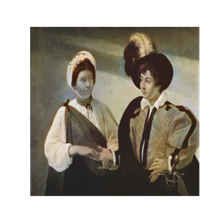

In [29]:
# imglst = ['outputs/' + fname for fname in os.listdir('outputs')]
# imglst.remove('outputs/.ipynb_checkpoints')
# for newimg in tqdm(imglst):
#     with open(newimg, 'rb') as f:
# #         print('printing', newimg, type(file))
#         openimg = Image.open(f)
#         img = openimg.resize((224, 224))
#         display(img)